In [283]:

#Load libraries
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib.dates import YearLocator, DateFormatter
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [284]:
#load dataset
train_df = pd.read_csv("C:/Users/DELL/Desktop/DINNO/Python_Project/American_Express_Analysis/train.csv")
test_df = pd.read_csv("C:/Users/DELL/Desktop/DINNO/Python_Project/American_Express_Analysis/test.csv")

In [285]:
train_df.shape

(45528, 19)

In [286]:
test_df.shape

(11383, 18)

In [287]:
train_df.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
5,CST_123268,Sarah Marsh,46,F,Y,N,0.0,252765.91,2898.0,Accountants,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
6,CST_127502,Mason,38,M,N,Y,1.0,262389.20,5541.0,High skill tech staff,3.0,0.0,50839.39,41311.08,42,733.0,0,0,0
7,CST_151722,Saba,46,F,Y,Y,1.0,241211.39,1448.0,Core staff,3.0,0.0,30008.46,32209.22,91,906.0,0,0,0
8,CST_133768,Ashutosh,40,F,NaN,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
9,CST_111670,David Milliken,39,F,Y,Y,2.0,207109.13,2791.0,High skill tech staff,4.0,0.0,9509.10,28425.52,14,666.0,0,0,0


In [288]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [289]:
# Check for missing values
if train_df.isnull().values.any():
    missing_values = train_df.isna().sum()
    missing_values_colums = missing_values[missing_values > 0]
    missing_count = train_df.isnull().sum().sum()
    total_cells = train_df.size
    missing_percentage = (missing_count / total_cells) * 100

    print(f"Yes, there are {missing_count} missing values.")
    print(f"This represents {missing_percentage:.2f}% of the entire dataset.")
    print("Columns with missing values:")
    print(missing_values_colums)
else:
    print("No missing values found.")


Yes, there are 2057 missing values.
This represents 0.24% of the entire dataset.
Columns with missing values:
owns_car                547
no_of_children          774
no_of_days_employed     463
total_family_members     83
migrant_worker           87
yearly_debt_payments     95
credit_score              8
dtype: int64


In [290]:
# Total sum of rows
total_rows = len(train_df)
print("Total rows:", total_rows)

# Percentage of missing values for each column
missing_percentages = (train_df.isnull().sum() / total_rows) * 100

cols = train_df.columns 

for i in cols:
    if len(train_df[i].value_counts()) <= 20:
        print("Column Name:", i)
        print(train_df[i].value_counts())
        print("*" * 50)

# Print percentage of missing values for each column
print("\nPercentage of missing values:")
print(missing_percentages)


Total rows: 45528
Column Name: gender
gender
F      29957
M      15570
XNA        1
Name: count, dtype: int64
**************************************************
Column Name: owns_car
owns_car
N    29743
Y    15238
Name: count, dtype: int64
**************************************************
Column Name: owns_house
owns_house
Y    31642
N    13886
Name: count, dtype: int64
**************************************************
Column Name: no_of_children
no_of_children
0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
8.0        1
9.0        1
Name: count, dtype: int64
**************************************************
Column Name: occupation_type
occupation_type
Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
S

In [291]:
# Replace all occurrences of "XNA" in the 'gender' column with "M"(since XNA is not gender, its assumed it was error mistaken for Male)
column_to_change = 'gender'
gender_value = 'M'

train_df.loc[train_df[column_to_change] == 'XNA', column_to_change] = gender_value


# Fill missing values of 'owns_car', 'no_of_children', 'total_family_members', and 'migrant_worker' with mode
# Define a function to fill null values with a randomly selected mode
def fill_null_with_random_mode(column):
    modes = column.mode()
    return column.apply(lambda x: np.random.choice(modes) if pd.isnull(x) else x)

# Fill missing values with random modes for the specified columns
columns_to_fill = ['owns_car', 'no_of_children', 'total_family_members', 'migrant_worker']
for col in columns_to_fill:
    train_df[col] = fill_null_with_random_mode(train_df[col])

# Calculate median of 'no_of_days_employed' grouped by 'occupation_type'
median_days_employed = train_df.groupby('occupation_type')['no_of_days_employed'].median()

# Fill missing values of 'no_of_days_employed' with median based on 'occupation_type'
train_df['no_of_days_employed'] = train_df.apply(lambda x: median_days_employed[x['occupation_type']] 
                                                 if pd.isna(x['no_of_days_employed']) else x['no_of_days_employed'], axis=1)

# Calculate median of 'credit_score' based on 'prev_defaults'
median_credit_score = train_df.groupby('prev_defaults')['credit_score'].median()

# Fill missing values of 'credit_score' with median based on 'prev_defaults'
train_df['credit_score'] = train_df.apply(lambda x: median_credit_score[x['prev_defaults']] 
                                          if pd.isna(x['credit_score']) else x['credit_score'], axis=1)

# Calculate median of 'yearly_debt_payments' based on 'credit_card_default'
median_yearly_debt_payments = train_df.groupby('credit_card_default')['yearly_debt_payments'].median()

# Fill missing values of 'yearly_debt_payments' with median based on 'credit_card_default'
train_df['yearly_debt_payments'] = train_df.apply(lambda x: median_yearly_debt_payments[x['credit_card_default']] 
                                                  if pd.isna(x['yearly_debt_payments']) else x['yearly_debt_payments'], axis=1)


In [292]:
# Check for missing values
if train_df.isnull().values.any():
    missing_values = train_df.isna().sum()
    missing_values_colums = missing_values[missing_values > 0]
    missing_count = train_df.isnull().sum().sum()
    total_cells = train_df.size
    missing_percentage = (missing_count / total_cells) * 100

    print(f"Yes, there are {missing_count} missing values.")
    print(f"This represents {missing_percentage:.2f}% of the entire dataset.")
    print("Columns with missing values:")
    print(missing_values_colums)
else:
    print("No missing values found.")


No missing values found.


In [293]:
train_df.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
5,CST_123268,Sarah Marsh,46,F,Y,N,0.0,252765.91,2898.0,Accountants,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
6,CST_127502,Mason,38,M,N,Y,1.0,262389.20,5541.0,High skill tech staff,3.0,0.0,50839.39,41311.08,42,733.0,0,0,0
7,CST_151722,Saba,46,F,Y,Y,1.0,241211.39,1448.0,Core staff,3.0,0.0,30008.46,32209.22,91,906.0,0,0,0
8,CST_133768,Ashutosh,40,F,N,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
9,CST_111670,David Milliken,39,F,Y,Y,2.0,207109.13,2791.0,High skill tech staff,4.0,0.0,9509.10,28425.52,14,666.0,0,0,0


In [294]:
# Convert selected columns from float to int
columns_to_convert = ['no_of_children', 'no_of_days_employed', 'total_family_members', 'migrant_worker', 'credit_score']

for column in columns_to_convert:
    train_df[column] = train_df[column].astype(int)


In [295]:
train_df.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0,107934.04,612,Unknown,1,1,33070.28,18690.93,73,544,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0,109862.62,2771,Laborers,2,0,15329.53,37745.19,52,857,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0,230153.17,204,Laborers,2,0,48416.60,41598.36,43,650,0,0,0
3,CST_128288,Rie,39,F,N,Y,0,122325.82,11941,Core staff,2,0,22574.36,32627.76,20,754,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0,387286.00,1459,Core staff,1,0,38282.95,52950.64,75,927,0,0,0
5,CST_123268,Sarah Marsh,46,F,Y,N,0,252765.91,2898,Accountants,2,1,37046.86,40245.64,19,937,0,0,0
6,CST_127502,Mason,38,M,N,Y,1,262389.20,5541,High skill tech staff,3,0,50839.39,41311.08,42,733,0,0,0
7,CST_151722,Saba,46,F,Y,Y,1,241211.39,1448,Core staff,3,0,30008.46,32209.22,91,906,0,0,0
8,CST_133768,Ashutosh,40,F,N,Y,0,210091.43,11551,Laborers,2,0,21521.89,65037.74,14,783,0,0,0
9,CST_111670,David Milliken,39,F,Y,Y,2,207109.13,2791,High skill tech staff,4,0,9509.10,28425.52,14,666,0,0,0


In [296]:
# Total sum of rows
total_rows = len(train_df)
print("Total rows:", total_rows)

# Percentage of missing values for each column
missing_percentages = (train_df.isnull().sum() / total_rows) * 100

cols = train_df.columns 

for i in cols:
    if len(train_df[i].value_counts()) <= 20:
        print("Column Name:", i)
        print(train_df[i].value_counts())
        print("*" * 50)

# Print percentage of missing values for each column
print("\nPercentage of missing values:")
print(missing_percentages)


Total rows: 45528
Column Name: gender
gender
F    29957
M    15571
Name: count, dtype: int64
**************************************************
Column Name: owns_car
owns_car
N    30290
Y    15238
Name: count, dtype: int64
**************************************************
Column Name: owns_house
owns_house
Y    31642
N    13886
Name: count, dtype: int64
**************************************************
Column Name: no_of_children
no_of_children
0    32015
1     8985
2     3862
3      584
4       60
5       13
6        6
7        1
8        1
9        1
Name: count, dtype: int64
**************************************************
Column Name: occupation_type
occupation_type
Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking

In [297]:
# Save train_df to an Excel file
train_file_path = 'traiin_df.xlsx'
train_df.to_excel(train_file_path, index=False)

print(f"traiin_df has been saved to {train_file_path}")


traiin_df has been saved to traiin_df.xlsx


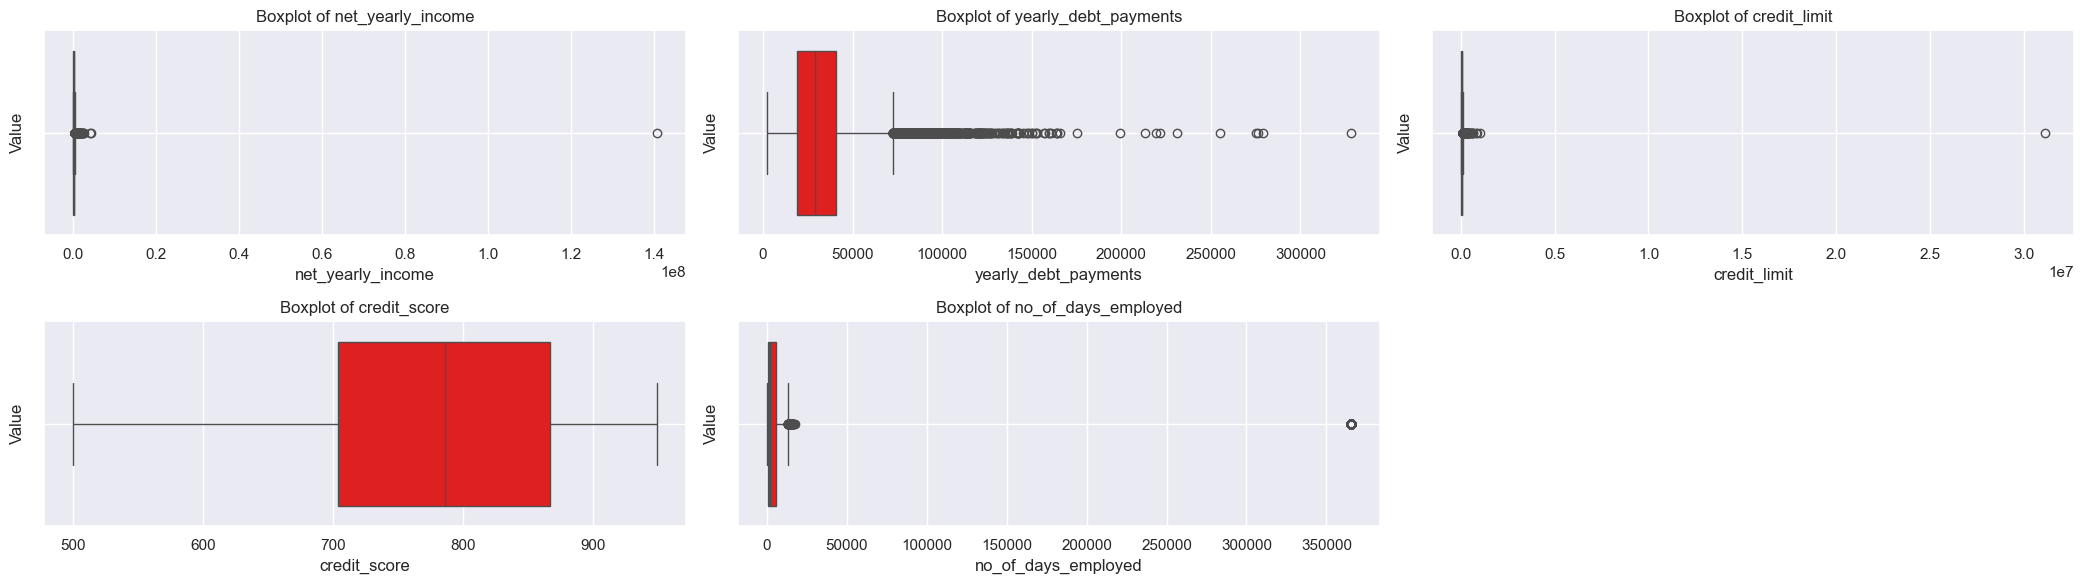

In [298]:
# Define continuous variables
continuous_vars = ['net_yearly_income', 'yearly_debt_payments', 'credit_limit', 'credit_score', 'no_of_days_employed']

# Calculate the number of rows and columns for the subplot grid
num_plots = len(continuous_vars)
num_rows = 2
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(7 * num_cols, 3 * num_rows))

# Flatten the axes
axes = axes.flatten()

# Plot boxplots for each continuous variable
for i, var in enumerate(continuous_vars):
    sns.boxplot(x=train_df[var], ax=axes[i], color='red')
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

# Remove empty subplots if there are any
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


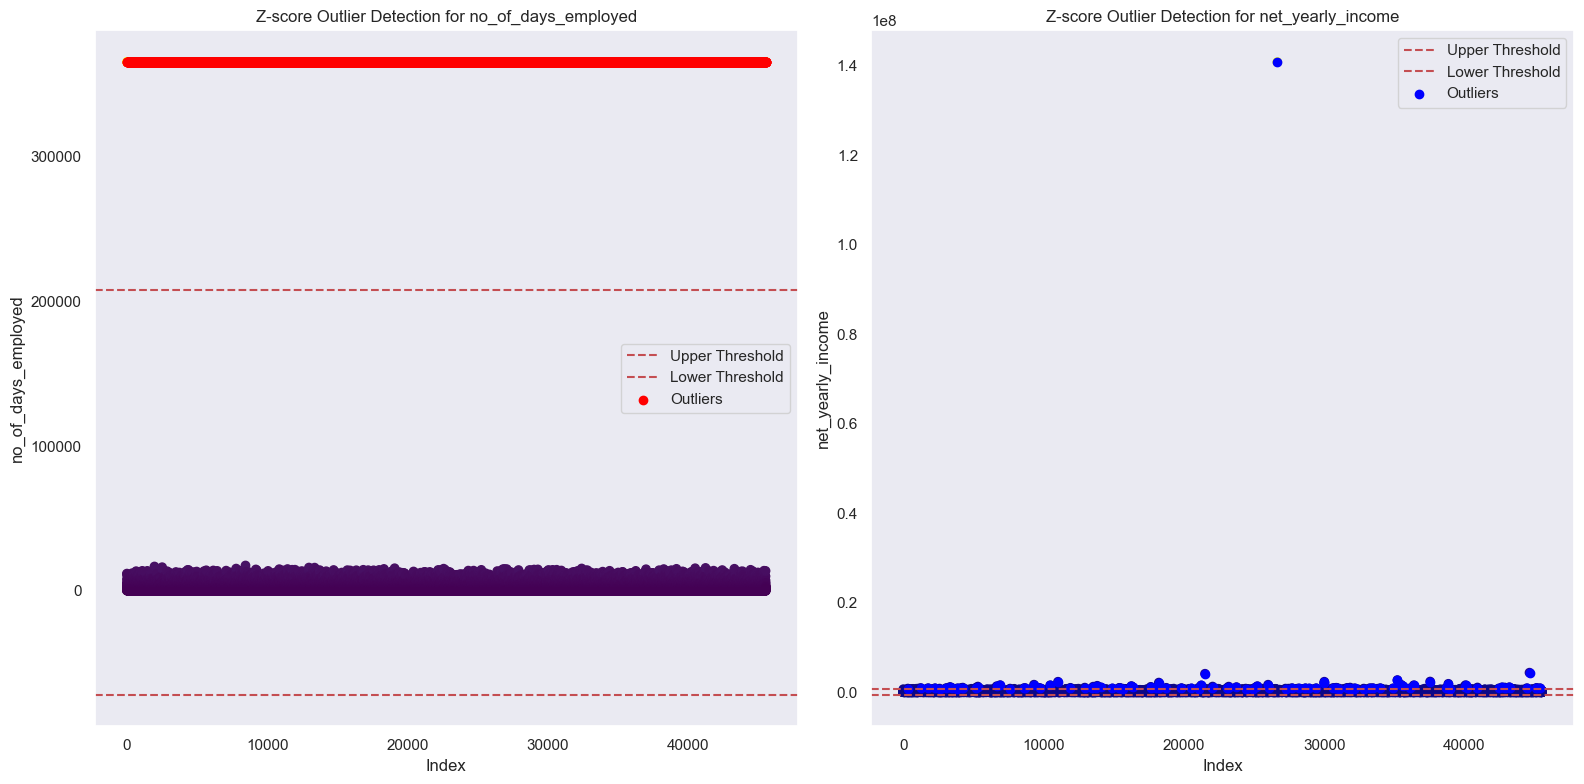

In [299]:
# Define threshold for outlier detection
threshold = 1

# Calculate mean and standard deviation of 'no_of_days_employed'
mean_days_employed = train_df['no_of_days_employed'].mean()
std_days_employed = train_df['no_of_days_employed'].std()

# Calculate mean and standard deviation of 'net_yearly_income'
mean_net_income = train_df['net_yearly_income'].mean()
std_net_income = train_df['net_yearly_income'].std()

# Calculate Z-score for 'no_of_days_employed'
train_df['z_score_days'] = (train_df['no_of_days_employed'] - mean_days_employed) / std_days_employed

# Calculate Z-score for 'net_yearly_income'
train_df['z_score_income'] = (train_df['net_yearly_income'] - mean_net_income) / std_net_income

# Identify outliers based on Z-score for 'no_of_days_employed'
outliers_days_employed = train_df[abs(train_df['z_score_days']) > threshold]

# Identify outliers based on Z-score for 'net_yearly_income'
outliers_income = train_df[abs(train_df['z_score_income']) > threshold]

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot for 'no_of_days_employed'
axs[0].scatter(train_df.index, train_df['no_of_days_employed'], c=train_df['z_score_days'], cmap='viridis')
axs[0].axhline(y=mean_days_employed + threshold * std_days_employed, color='r', linestyle='--', label='Upper Threshold')
axs[0].axhline(y=mean_days_employed - threshold * std_days_employed, color='r', linestyle='--', label='Lower Threshold')
axs[0].scatter(outliers_days_employed.index, outliers_days_employed['no_of_days_employed'], color='red', label='Outliers')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('no_of_days_employed')
axs[0].set_title('Z-score Outlier Detection for no_of_days_employed')
axs[0].legend()

# Plot for 'net_yearly_income'
axs[1].scatter(train_df.index, train_df['net_yearly_income'], c=train_df['z_score_income'], cmap='plasma')
axs[1].axhline(y=mean_net_income + threshold * std_net_income, color='r', linestyle='--', label='Upper Threshold')
axs[1].axhline(y=mean_net_income - threshold * std_net_income, color='r', linestyle='--', label='Lower Threshold')
axs[1].scatter(outliers_income.index, outliers_income['net_yearly_income'], color='blue', label='Outliers')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('net_yearly_income')
axs[1].set_title('Z-score Outlier Detection for net_yearly_income')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [300]:
# rows corresponding to outliers
outlier_days = len(outliers_days_employed)
outlier_income = len(outliers_income)

# Total rows that are outliers
total_outliers = len(outliers_days_employed) + len(outliers_income)

# Percentage of outliers in the dataset
percentage_outliers = (total_outliers / len(train_df)) * 100

# Min and Max outlier values for 'no_of_days_employed'
min_outlier_days = outliers_days_employed['no_of_days_employed'].min()
max_outlier_days = outliers_days_employed['no_of_days_employed'].max()

# Min and Max outlier values for 'net_yearly_income'
min_outlier_income = outliers_income['net_yearly_income'].min()
max_outlier_income = outliers_income['net_yearly_income'].max()

# Print the information
print("Total rows corresponding to outliers for 'net_yearly_income':", outlier_income)
print("Total rows corresponding to outliers for 'no_of_days_employed':", outlier_days)
print("sum of rows that are outliers in df:", total_outliers)
print("Percentage of outliers in the dataset:", percentage_outliers, "%")
print("Min Outlier value for no_of_days_employed:", min_outlier_days)
print("Max Outlier value for no_of_days_employed:", max_outlier_days)
print("Min Outlier value for net_yearly_income:", min_outlier_income)
print("Max Outlier value for net_yearly_income:", max_outlier_income)


Total rows corresponding to outliers for 'net_yearly_income': 107
Total rows corresponding to outliers for 'no_of_days_employed': 8229
sum of rows that are outliers in df: 8336
Percentage of outliers in the dataset: 18.309611667545248 %
Min Outlier value for no_of_days_employed: 365240
Max Outlier value for no_of_days_employed: 365252
Min Outlier value for net_yearly_income: 869738.67
Max Outlier value for net_yearly_income: 140759012.73


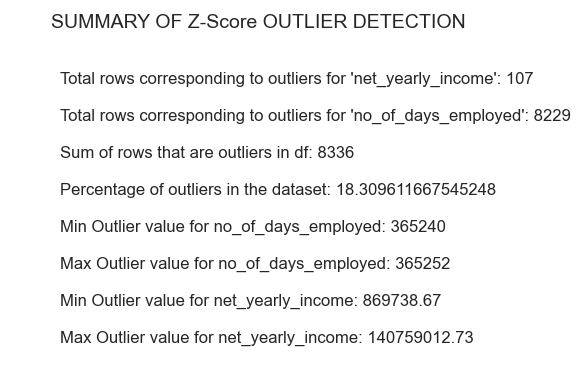

In [301]:
# Define the information to be displayed
info = {
    "Total rows corresponding to outliers for 'net_yearly_income'": outlier_income,
    "Total rows corresponding to outliers for 'no_of_days_employed'": outlier_days,
    "Sum of rows that are outliers in df": total_outliers,
    "Percentage of outliers in the dataset": percentage_outliers,
    "Min Outlier value for no_of_days_employed": min_outlier_days,
    "Max Outlier value for no_of_days_employed": max_outlier_days,
    "Min Outlier value for net_yearly_income": min_outlier_income,
    "Max Outlier value for net_yearly_income": max_outlier_income
}

# Create a figure
fig, ax = plt.subplots()

# Set the background color of the figure
fig.patch.set_facecolor('white')

# Set the font size
plt.rcParams.update({'font.size': 12})

# Plot the information
plt.text(0.5, 0.95, "SUMMARY OF Z-Score OUTLIER DETECTION", ha='center', fontsize=14, transform=ax.transAxes)

for i, (key, value) in enumerate(info.items()):
    plt.text(0.1, 0.8 - i * 0.1, f"{key}: {value}", transform=ax.transAxes)

# Hide axes
plt.axis('off')

# Save the plot as an image
plt.savefig('outlier_information.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [302]:
# Drop outliers
train_df.drop(outliers_days_employed.index, inplace=True)


In [303]:
# recall
outliers_income = train_df[abs(train_df['z_score_income']) > threshold]

# Drop outliers
train_df.drop(outliers_income.index, inplace=True)

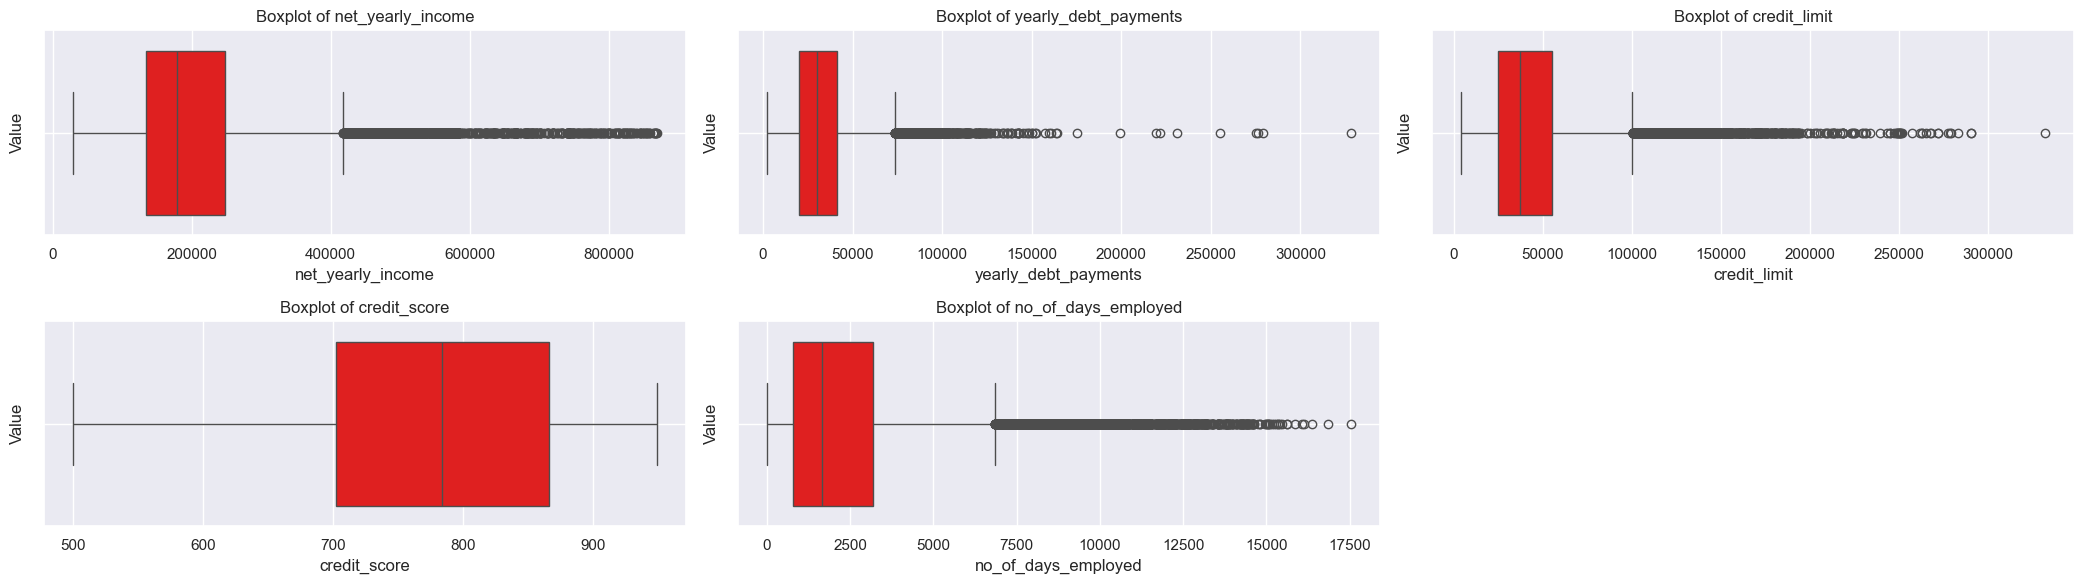

In [304]:
# Define continuous variables
continuous_vars = ['net_yearly_income', 'yearly_debt_payments', 'credit_limit', 'credit_score', 'no_of_days_employed']

# Calculate the number of rows and columns for the subplot grid
num_plots = len(continuous_vars)
num_rows = 2
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(7 * num_cols, 3 * num_rows))

# Flatten the axes
axes = axes.flatten()

# Plot boxplots for each continuous variable
for i, var in enumerate(continuous_vars):
    sns.boxplot(x=train_df[var], ax=axes[i], color='red')
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

# Remove empty subplots if there are any
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [305]:
train_df.shape

(37197, 21)

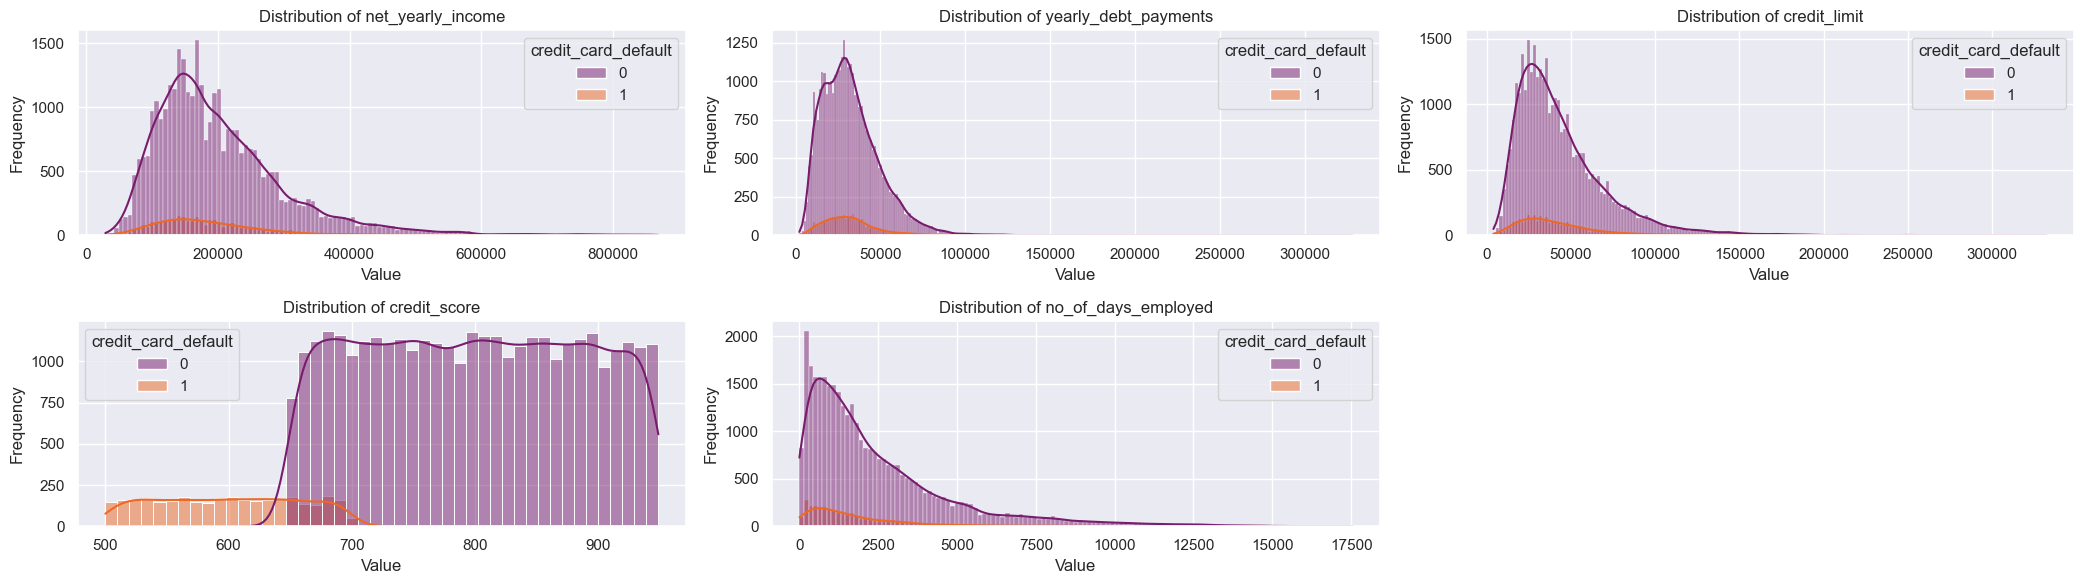

In [306]:
# Define continuous variables
continuous_vars = ['net_yearly_income', 'yearly_debt_payments', 'credit_limit', 'credit_score', 'no_of_days_employed']

# Calculate the number of rows and columns for the subplot grid
num_plots = len(continuous_vars)
num_rows = 2
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(7 * num_cols, 3 * num_rows))

# Flatten the axes
axes = axes.flatten()

# Plot distribution plots for each continuous variable
for i, var in enumerate(continuous_vars):
    sns.histplot(data=train_df, x=var, ax=axes[i], kde=True, hue='credit_card_default', palette='inferno')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Remove empty subplots if there are any
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [307]:
# Calculate skewness for each continuous variable
skewness = train_df[continuous_vars].skew()

# Print the skewness for each variable
print("Skewness for each continuous variable:")
print(skewness)


Skewness for each continuous variable:
net_yearly_income       1.798098
yearly_debt_payments    1.700305
credit_limit            2.039090
credit_score           -0.299765
no_of_days_employed     1.955427
dtype: float64


# Data Pre-Processing 

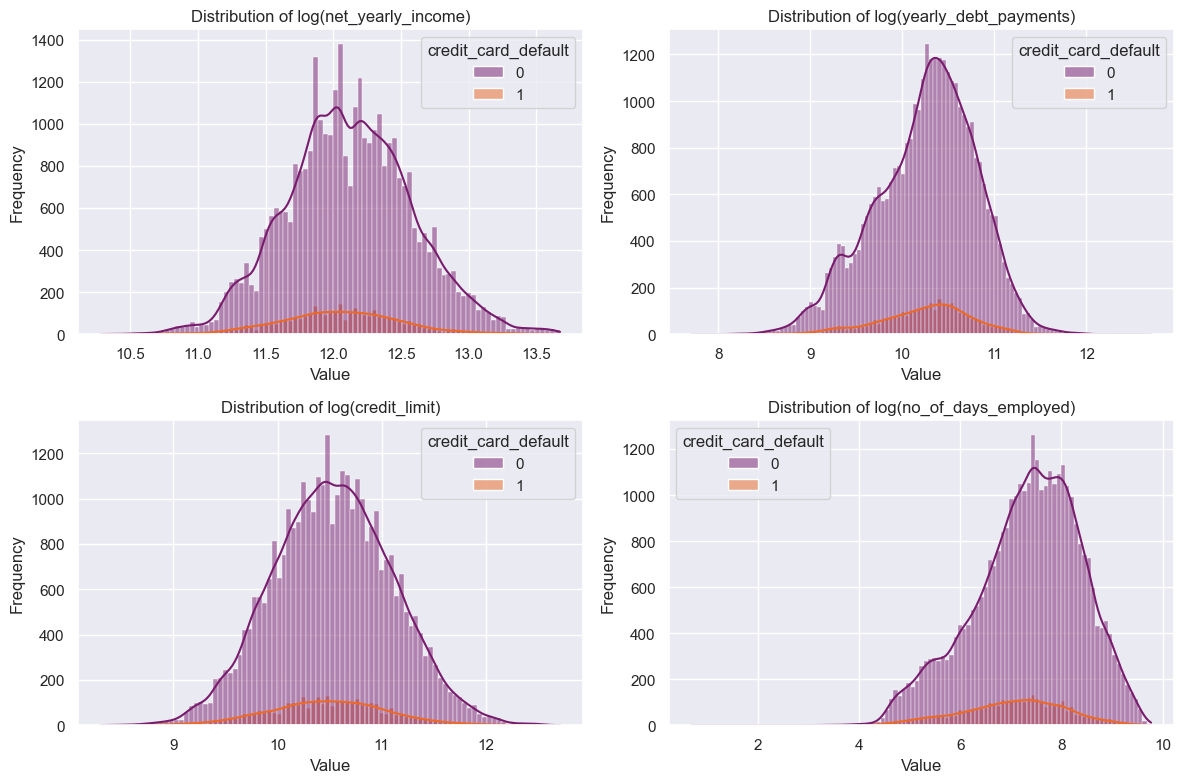

In [308]:
# Define positively skewed variables
positively_skewed_vars = ['net_yearly_income', 'yearly_debt_payments', 'credit_limit', 'no_of_days_employed']

# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes
axes = axes.flatten()

# Plot histograms of transformed variables
for i, var in enumerate(positively_skewed_vars):
    if train_df[var].min() > 0:  # Check if the minimum value is positive
        sns.histplot(data=train_df, x=np.log(train_df[var]), kde=True, ax=axes[i], hue='credit_card_default', palette='inferno')
        axes[i].set_title(f'Distribution of log({var})')
    else:
        sns.histplot(data=train_df, x=train_df[var], kde=True, ax=axes[i], hue='credit_card_default', palette='inferno')
        axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [309]:
train_df.head()


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,...,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,z_score_days,z_score_income
0,CST_115179,ita Bose,46,F,N,Y,0,107934.04,612,Unknown,...,1,33070.28,18690.93,73,544,2,1,1,-0.482467,-0.138582
1,CST_121920,Alper Jonathan,29,M,N,Y,0,109862.62,2771,Laborers,...,0,15329.53,37745.19,52,857,0,0,0,-0.467006,-0.135699
2,CST_109330,Umesh Desai,37,M,N,Y,0,230153.17,204,Laborers,...,0,48416.60,41598.36,43,650,0,0,0,-0.485388,0.044087
3,CST_128288,Rie,39,F,N,Y,0,122325.82,11941,Core staff,...,0,22574.36,32627.76,20,754,0,0,0,-0.401338,-0.117072
4,CST_151355,McCool,46,M,Y,Y,0,387286.00,1459,Core staff,...,0,38282.95,52950.64,75,927,0,0,0,-0.476401,0.278938


In [310]:
#encode cathegorical varibales
from sklearn.preprocessing import OrdinalEncoder

# Define categorical columns
cat_cols = ['gender', 'owns_car', 'owns_house', 'occupation_type']

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform categorical columns
train_df[cat_cols] = encoder.fit_transform(train_df[cat_cols])

# Convert encoded categorical columns to integer type
train_df[cat_cols] = train_df[cat_cols].astype(int)

# Display the mapping of categories to encoded values for each column
for col, categories in zip(cat_cols, encoder.categories_):
    print(f"Mapping of categories to encoded values for {col}:")
    print({index: category for index, category in enumerate(categories)})
    print()


Mapping of categories to encoded values for gender:
{0: 'F', 1: 'M'}

Mapping of categories to encoded values for owns_car:
{0: 'N', 1: 'Y'}

Mapping of categories to encoded values for owns_house:
{0: 'N', 1: 'Y'}

Mapping of categories to encoded values for occupation_type:
{0: 'Accountants', 1: 'Cleaning staff', 2: 'Cooking staff', 3: 'Core staff', 4: 'Drivers', 5: 'HR staff', 6: 'High skill tech staff', 7: 'IT staff', 8: 'Laborers', 9: 'Low-skill Laborers', 10: 'Managers', 11: 'Medicine staff', 12: 'Private service staff', 13: 'Realty agents', 14: 'Sales staff', 15: 'Secretaries', 16: 'Security staff', 17: 'Unknown', 18: 'Waiters/barmen staff'}



In [311]:
train_df.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,...,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,z_score_days,z_score_income
0,CST_115179,ita Bose,46,0,0,1,0,107934.04,612,17,...,1,33070.28,18690.93,73,544,2,1,1,-0.482467,-0.138582
1,CST_121920,Alper Jonathan,29,1,0,1,0,109862.62,2771,8,...,0,15329.53,37745.19,52,857,0,0,0,-0.467006,-0.135699
2,CST_109330,Umesh Desai,37,1,0,1,0,230153.17,204,8,...,0,48416.60,41598.36,43,650,0,0,0,-0.485388,0.044087
3,CST_128288,Rie,39,0,0,1,0,122325.82,11941,3,...,0,22574.36,32627.76,20,754,0,0,0,-0.401338,-0.117072
4,CST_151355,McCool,46,1,1,1,0,387286.00,1459,3,...,0,38282.95,52950.64,75,927,0,0,0,-0.476401,0.278938
5,CST_123268,Sarah Marsh,46,0,1,0,0,252765.91,2898,0,...,1,37046.86,40245.64,19,937,0,0,0,-0.466096,0.077884
6,CST_127502,Mason,38,1,0,1,1,262389.20,5541,6,...,0,50839.39,41311.08,42,733,0,0,0,-0.447169,0.092267
7,CST_151722,Saba,46,0,1,1,1,241211.39,1448,3,...,0,30008.46,32209.22,91,906,0,0,0,-0.476480,0.060615
8,CST_133768,Ashutosh,40,0,0,1,0,210091.43,11551,8,...,0,21521.89,65037.74,14,783,0,0,0,-0.404131,0.014103
9,CST_111670,David Milliken,39,0,1,1,2,207109.13,2791,6,...,0,9509.10,28425.52,14,666,0,0,0,-0.466863,0.009645


In [312]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37197 entries, 0 to 45527
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              37197 non-null  object 
 1   name                     37197 non-null  object 
 2   age                      37197 non-null  int64  
 3   gender                   37197 non-null  int32  
 4   owns_car                 37197 non-null  int32  
 5   owns_house               37197 non-null  int32  
 6   no_of_children           37197 non-null  int32  
 7   net_yearly_income        37197 non-null  float64
 8   no_of_days_employed      37197 non-null  int32  
 9   occupation_type          37197 non-null  int32  
 10  total_family_members     37197 non-null  int32  
 11  migrant_worker           37197 non-null  int32  
 12  yearly_debt_payments     37197 non-null  float64
 13  credit_limit             37197 non-null  float64
 14  credit_limit_used(%)     37

In [313]:
train_df_copy = train_df.copy()

#Drop columns not needed
train_df_copy.drop(columns=['customer_id', 'name','z_score_days','z_score_income'], inplace=True)

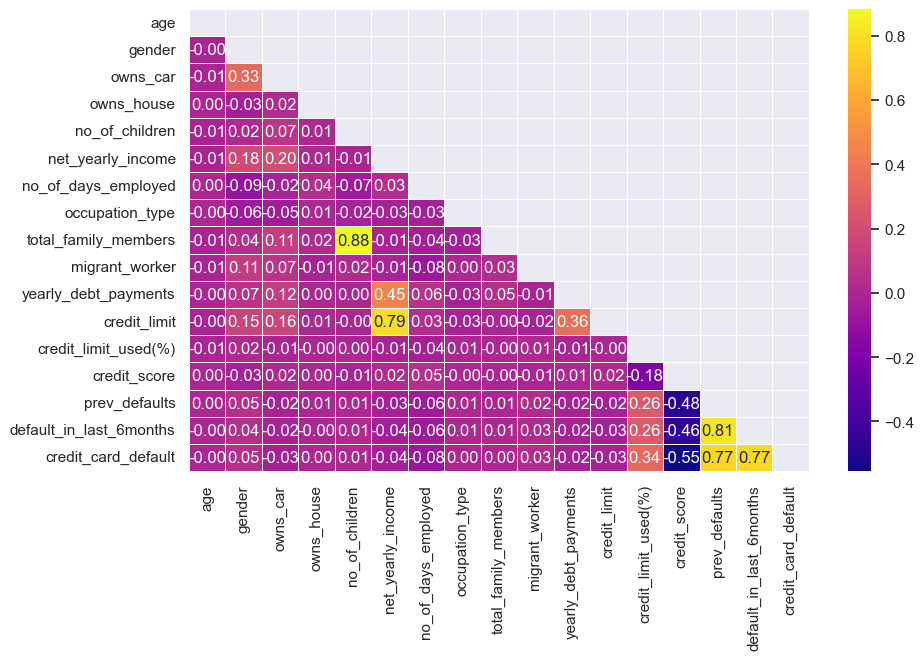

In [314]:
# Reorder columns such that 'credit_card_default' is placed at the end
other_columns = [col for col in train_df_copy.columns if col != 'credit_card_default']
desired_columns = other_columns + ['credit_card_default']
train_df_reordered = train_df_copy[desired_columns]

# Calculate the correlation matrix
corr_matrix = train_df_reordered.corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask=mask, cmap='plasma', annot=True, fmt=".2f", linewidths=0.5)
plt.show()


In [315]:
# Scaling the variables for modeling
# Select the numerical and featured variables columns for scaling
t_columns = train_df_copy.drop(columns=['credit_card_default']).columns
scale = train_df[t_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(scale)

# Create DataFrame with the scaled data
newscaled_df = pd.DataFrame(scaled_data, columns=t_columns, index=train_df_copy.index)

# Combining the scaled numerical data with non-numerical columns
scaled_df = pd.concat([newscaled_df, train_df_copy.drop(columns=t_columns)], axis=1)


In [316]:
scaled_df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,0.733680,-0.775269,-0.761507,0.682478,-0.648869,-0.920862,-0.758718,1.452401,-1.329894,1.894568,0.028710,-0.918280,0.698858,-2.341020,7.068416,4.185114,1
1,-1.046774,1.289875,-0.761507,0.682478,-0.648869,-0.902244,0.156739,-0.255370,-0.270439,-0.527825,-0.993755,-0.228449,-0.016442,0.749253,-0.237968,-0.238942,0
2,-0.208913,1.289875,-0.761507,0.682478,-0.648869,0.258986,-0.931717,-0.255370,-0.270439,-0.527825,0.913174,-0.088951,-0.322999,-1.294474,-0.237968,-0.238942,0
3,0.000552,-0.775269,-0.761507,0.682478,-0.648869,-0.781930,4.044993,-1.204132,-0.270439,-0.527825,-0.576209,-0.413718,-1.106423,-0.267674,-0.237968,-0.238942,0
4,0.733680,1.289875,1.313186,0.682478,-0.648869,1.775876,-0.399574,-1.204132,-1.329894,-0.527825,0.329135,0.322042,0.766982,1.440369,-0.237968,-0.238942,0


# Modeling

In [317]:
# Define variables
X = scaled_df.drop(columns=['credit_card_default'])
y = scaled_df['credit_card_default']

# Model split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Metrics to evaluate the model
metrics = [accuracy_score, precision_score, recall_score, f1_score, confusion_matrix]

# Function to train the model
def model_training(model):
    # Train the model using the training data
    model.fit(X_train, y_train)
    # Make predictions on the test data
    return model.predict(X_test)

# Function to evaluate the model predictions
def evaluate(preds, metrics):
    scores = []
    # Calculate evaluation scores using the provided metrics
    for metric in metrics:
        scores.append(metric(preds, y_test))
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(preds, y_test)
    # Return evaluation scores and confusion matrix
    return scores, conf_matrix

# Function to plot the evaluation results
def plot_evaluation(scores, conf_matrix, model, X_test, y_test):
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Print evaluation scores
    print('Accuracy: '+str(scores[0]))
    print('Precision: '+str(scores[1]))
    print('Recall: '+str(scores[2]))
    print('F1 Score: '+str(scores[3]))
    
    # Plot ROC_AUC curve
    disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axs[0])
    disp.ax_.set_title('ROC_AUC Curve', fontsize=16)
    
    # Plot confusion matrix
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='BrBG', ax=axs[1])
    axs[1].set_xlabel('Predicted label')
    axs[1].set_ylabel('True label')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

Accuracy: 0.9741935483870968
Precision: 0.7647907647907648
Recall: 0.9481216457960644
F1 Score: 0.8466453674121406


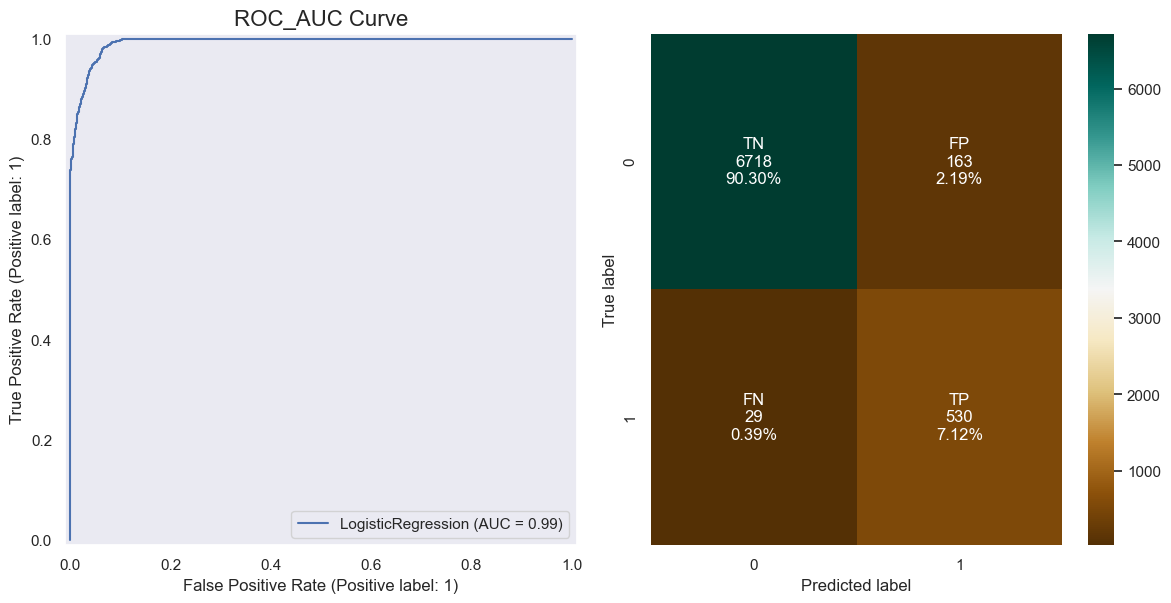

In [318]:
# Define logistic regression model with specific parameters
logreg_model = LogisticRegression(random_state=42)

# Train the model, make predictions, and evaluate
preds = model_training(logreg_model)
scores, conf_matrix = evaluate(preds, metrics)
plot_evaluation(scores, conf_matrix, logreg_model, X_test, y_test)


Accuracy: 0.969489247311828
Precision: 0.6911976911976911
Recall: 0.9735772357723578
F1 Score: 0.8084388185654009


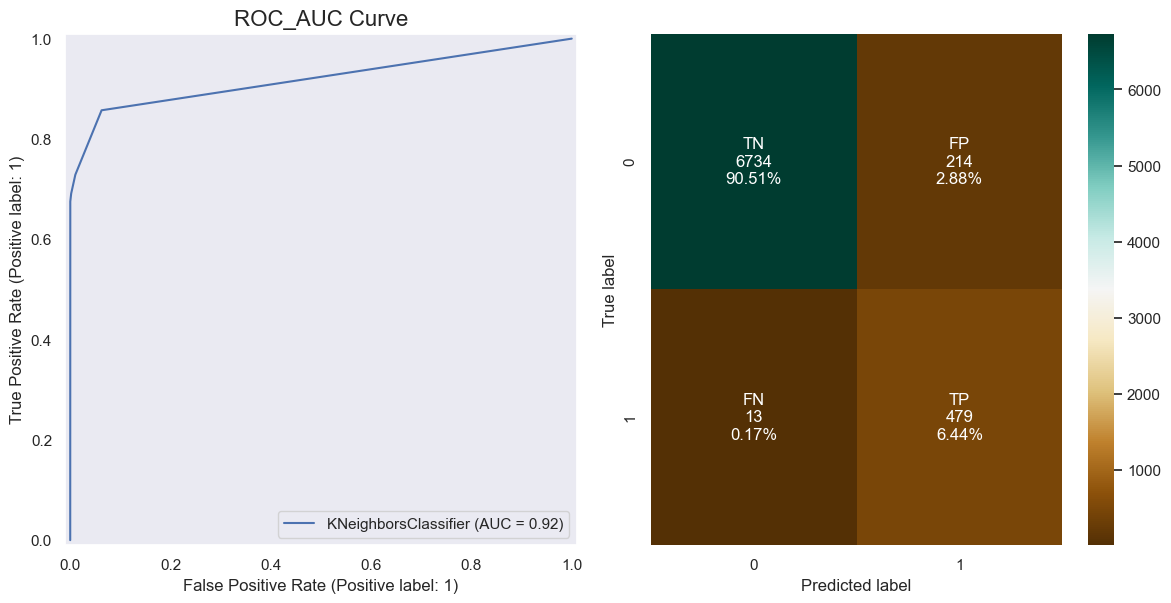

In [319]:
# Create KNN model with specific parameters
knn_model = KNeighborsClassifier(n_neighbors=4)

# Train the model, make predictions, and evaluate
preds = model_training(knn_model)
scores, conf_matrix = evaluate(preds, metrics)
plot_evaluation(scores, conf_matrix, knn_model, X_test, y_test)


Accuracy: 0.9745967741935484
Precision: 0.7287157287157288
Recall: 0.9980237154150198
F1 Score: 0.8423686405337781


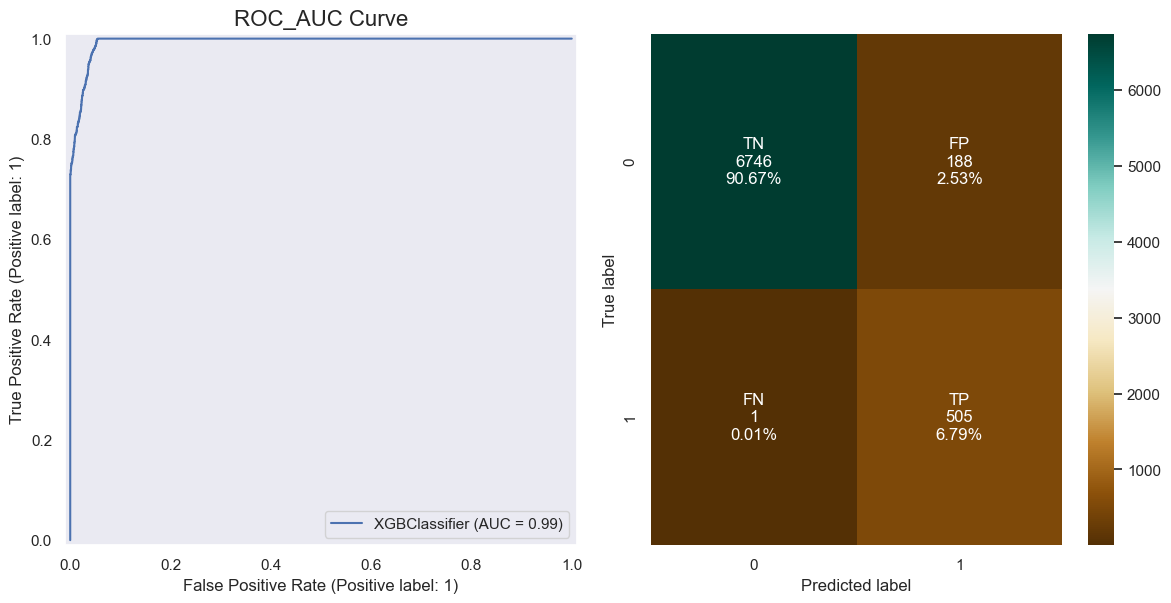

In [320]:
# Create XGBoost model with specific parameters
xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)

# Train the model, make predictions, and evaluate
preds = model_training(xgb_model)
scores, conf_matrix = evaluate(preds, metrics)
plot_evaluation(scores, conf_matrix, xgb_model, X_test, y_test)


Accuracy: 0.9739247311827957
Precision: 0.7287157287157288
Recall: 0.9882583170254403
F1 Score: 0.8388704318936877


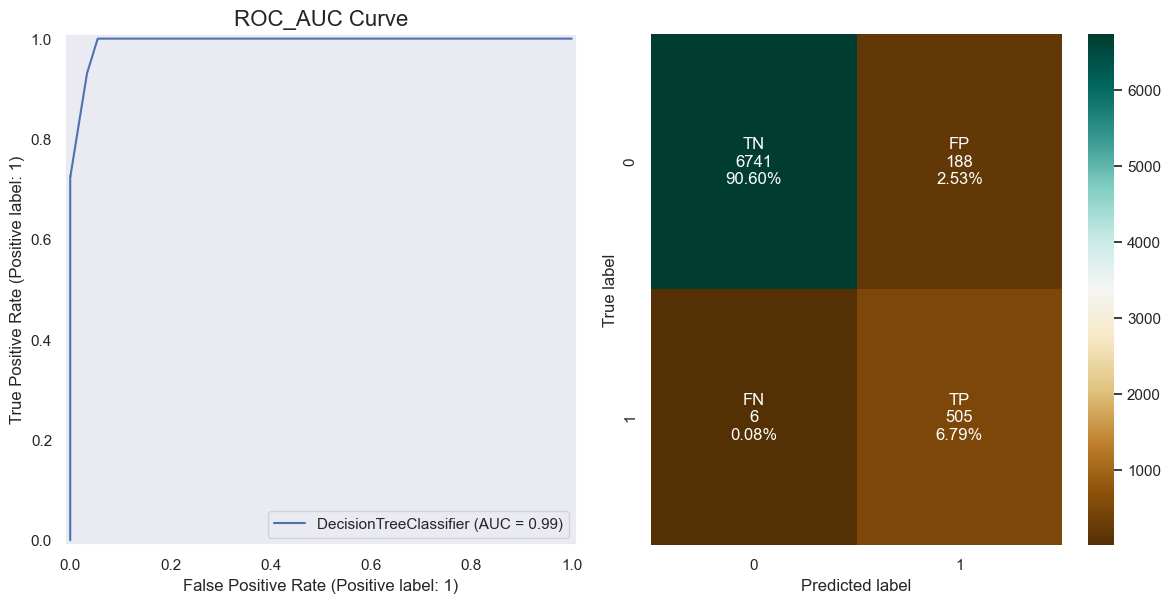

In [321]:
# Create Decision Tree model with specific parameters
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model, make predictions, and evaluate
preds = model_training(dt_model)
scores, conf_matrix = evaluate(preds, metrics)
plot_evaluation(scores, conf_matrix, dt_model, X_test, y_test)


Accuracy: 0.969758064516129
Precision: 0.6753246753246753
Recall: 1.0
F1 Score: 0.8062015503875969


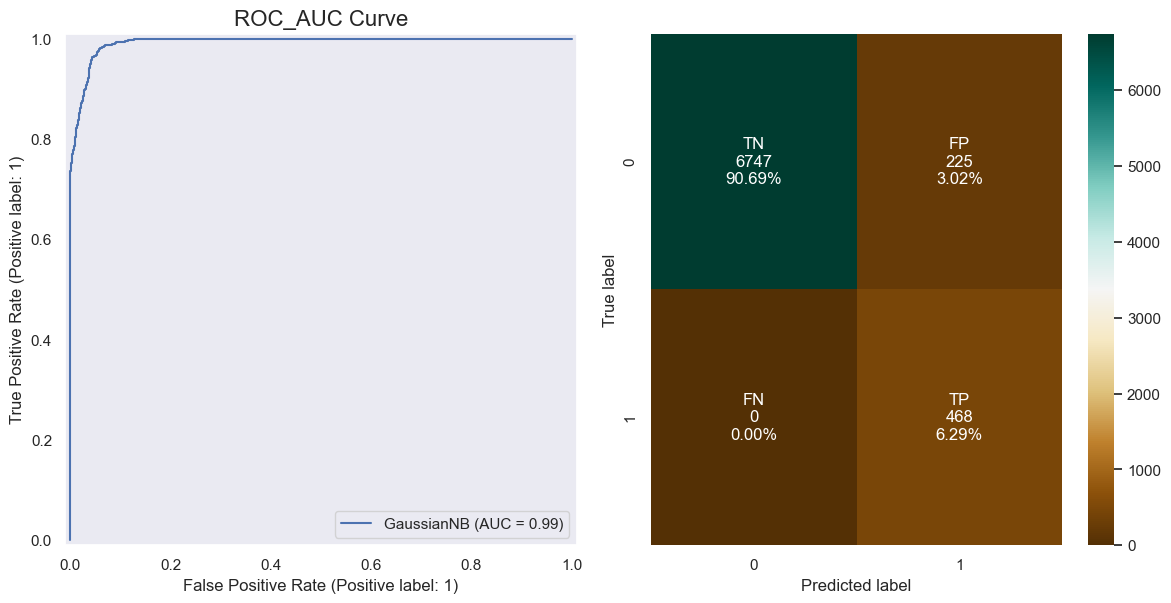

In [322]:
# Create Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model, make predictions, and evaluate
preds = model_training(gnb_model)
scores, conf_matrix = evaluate(preds, metrics)
plot_evaluation(scores, conf_matrix, gnb_model, X_test, y_test)

In [323]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

# Model Application


In [324]:
#Recall that test.df has been loaded
#check the df
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              11383 non-null  object 
 1   name                     11383 non-null  object 
 2   age                      11383 non-null  int64  
 3   gender                   11383 non-null  object 
 4   owns_car                 11251 non-null  object 
 5   owns_house               11383 non-null  object 
 6   no_of_children           11193 non-null  float64
 7   net_yearly_income        11383 non-null  float64
 8   no_of_days_employed      11278 non-null  float64
 9   occupation_type          11383 non-null  object 
 10  total_family_members     11352 non-null  float64
 11  migrant_worker           11357 non-null  float64
 12  yearly_debt_payments     11361 non-null  float64
 13  credit_limit             11383 non-null  float64
 14  credit_limit_used(%)  

In [325]:
# Check for missing values
if test_df.isnull().values.any():
    missing_values = test_df.isna().sum()
    missing_values_colums = missing_values[missing_values > 0]
    missing_count = test_df.isnull().sum().sum()
    total_cells = test_df.size
    missing_percentage = (missing_count / total_cells) * 100

    print(f"Yes, there are {missing_count} missing values.")
    print(f"This represents {missing_percentage:.2f}% of the entire dataset.")
    print("Columns with missing values:")
    print(missing_values_colums)
else:
    print("No missing values found.")


Yes, there are 509 missing values.
This represents 0.25% of the entire dataset.
Columns with missing values:
owns_car                132
no_of_children          190
no_of_days_employed     105
total_family_members     31
migrant_worker           26
yearly_debt_payments     22
credit_score              3
dtype: int64


In [326]:
# Total sum of rows
total_rows = len(test_df)
print("Total rows:", total_rows)

# Percentage of missing values for each column
missing_percentages = (test_df.isnull().sum() / total_rows) * 100

cols = test_df.columns 

for i in cols:
    if len(test_df[i].value_counts()) <= 20:
        print("Column Name:", i)
        print(test_df[i].value_counts())
        print("*" * 50)

# Print percentage of missing values for each column
print("\nPercentage of missing values:")
print(missing_percentages)


Total rows: 11383
Column Name: gender
gender
F      7443
M      3939
XNA       1
Name: count, dtype: int64
**************************************************
Column Name: owns_car
owns_car
N    7372
Y    3879
Name: count, dtype: int64
**************************************************
Column Name: owns_house
owns_house
Y    7861
N    3522
Name: count, dtype: int64
**************************************************
Column Name: no_of_children
no_of_children
0.0     7825
1.0     2248
2.0      957
3.0      138
4.0       19
5.0        4
7.0        1
11.0       1
Name: count, dtype: int64
**************************************************
Column Name: occupation_type
occupation_type
Unknown                  3546
Laborers                 2071
Sales staff              1176
Core staff               1018
Managers                  806
Drivers                   703
High skill tech staff     405
Accountants               365
Medicine staff            318
Security staff            252
Cooking staff

In [327]:
# Replace all occurrences of "XNA" in the 'gender' column with "M"
column_to_change = 'gender'
gender_value = 'M'
test_df.loc[test_df[column_to_change] == 'XNA', column_to_change] = gender_value

# Fill missing values of 'owns_car', 'no_of_children', 'total_family_members', and 'migrant_worker' with mode
import pandas as pd
import numpy as np

# Assuming train_df is your DataFrame and columns are 'owns_car', 'no_of_children', 'total_family_members', and 'migrant_worker'

# Define a function to fill null values with a randomly selected mode
def fill_null_with_random_mode(column):
    modes = column.mode()
    return column.apply(lambda x: np.random.choice(modes) if pd.isnull(x) else x)

# Fill missing values with random modes for the specified columns
columns_to_fill = ['owns_car', 'no_of_children', 'total_family_members', 'migrant_worker']
for col in columns_to_fill:
    test_df[col] = fill_null_with_random_mode(test_df[col])


# Calculate median of 'no_of_days_employed' grouped by 'occupation_type'
median_days_employed = test_df.groupby('occupation_type')['no_of_days_employed'].median()

# Fill missing values of 'no_of_days_employed' with median based on 'occupation_type'
test_df['no_of_days_employed'] = test_df.apply(lambda x: median_days_employed[x['occupation_type']] 
                                                 if pd.isna(x['no_of_days_employed']) else x['no_of_days_employed'], axis=1)

# Calculate median of 'credit_score' based on 'prev_defaults'
median_credit_score = test_df.groupby('prev_defaults')['credit_score'].median()

# Fill missing values of 'credit_score' with median based on 'prev_defaults'
test_df['credit_score'] = test_df.apply(lambda x: median_credit_score[x['prev_defaults']] 
                                          if pd.isna(x['credit_score']) else x['credit_score'], axis=1)

# Calculate median of 'yearly_debt_payments' based on 'credit_score'
median_yearly_debt_payments = test_df.groupby('credit_score')['yearly_debt_payments'].median()

# Fill missing values of 'yearly_debt_payments' with median based on 'credit_score'
test_df['yearly_debt_payments'] = test_df.apply(lambda x: median_yearly_debt_payments[x['credit_score']] 
                                                  if pd.isna(x['yearly_debt_payments']) else x['yearly_debt_payments'], axis=1)


In [328]:
# Check for missing values
if test_df.isnull().values.any():
    missing_values = test_df.isna().sum()
    missing_values_colums = missing_values[missing_values > 0]
    missing_count = test_df.isnull().sum().sum()
    total_cells = test_df.size
    missing_percentage = (missing_count / total_cells) * 100

    print(f"Yes, there are {missing_count} missing values.")
    print(f"This represents {missing_percentage:.2f}% of the entire dataset.")
    print("Columns with missing values:")
    print(missing_values_colums)
else:
    print("No missing values found.")


No missing values found.


In [329]:
test_df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [330]:
# Convert selected columns from float to int
columns_to_convert = ['no_of_children', 'no_of_days_employed', 'total_family_members', 'migrant_worker', 'credit_score']

for column in columns_to_convert:
    test_df[column] = test_df[column].astype(int)


In [331]:
test_df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0,232640.53,998,Unknown,2,0,14406.73,26524.40,4,779,0,0
1,CST_129215,Scott,48,F,N,N,1,284396.79,1338,Unknown,3,0,57479.99,68998.72,70,806,0,0
2,CST_138443,Victoria,50,F,N,N,1,149419.28,1210,Unknown,3,0,21611.01,25187.80,71,528,2,0
3,CST_123812,John McCrank,30,F,N,N,1,160437.54,503,Laborers,2,1,28990.76,29179.39,9,815,0,0
4,CST_144450,Martinne,52,M,N,Y,0,233480.37,157,Laborers,2,1,54213.72,82331.82,82,613,1,1


In [332]:
# encode cathegorical varibales
# Define categorical columns
cat_cols = ['gender', 'owns_car', 'owns_house', 'occupation_type']

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform categorical columns
test_df[cat_cols] = encoder.fit_transform(test_df[cat_cols])

# Convert encoded categorical columns to integer type
test_df[cat_cols] = test_df[cat_cols].astype(int)

# Display the mapping of categories to encoded values for each column
for col, categories in zip(cat_cols, encoder.categories_):
    print(f"Mapping of categories to encoded values for {col}:")
    print({index: category for index, category in enumerate(categories)})
    print()


Mapping of categories to encoded values for gender:
{0: 'F', 1: 'M'}

Mapping of categories to encoded values for owns_car:
{0: 'N', 1: 'Y'}

Mapping of categories to encoded values for owns_house:
{0: 'N', 1: 'Y'}

Mapping of categories to encoded values for occupation_type:
{0: 'Accountants', 1: 'Cleaning staff', 2: 'Cooking staff', 3: 'Core staff', 4: 'Drivers', 5: 'HR staff', 6: 'High skill tech staff', 7: 'IT staff', 8: 'Laborers', 9: 'Low-skill Laborers', 10: 'Managers', 11: 'Medicine staff', 12: 'Private service staff', 13: 'Realty agents', 14: 'Sales staff', 15: 'Secretaries', 16: 'Security staff', 17: 'Unknown', 18: 'Waiters/barmen staff'}



In [333]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              11383 non-null  object 
 1   name                     11383 non-null  object 
 2   age                      11383 non-null  int64  
 3   gender                   11383 non-null  int32  
 4   owns_car                 11383 non-null  int32  
 5   owns_house               11383 non-null  int32  
 6   no_of_children           11383 non-null  int32  
 7   net_yearly_income        11383 non-null  float64
 8   no_of_days_employed      11383 non-null  int32  
 9   occupation_type          11383 non-null  int32  
 10  total_family_members     11383 non-null  int32  
 11  migrant_worker           11383 non-null  int32  
 12  yearly_debt_payments     11383 non-null  float64
 13  credit_limit             11383 non-null  float64
 14  credit_limit_used(%)  

In [334]:
# Scaling the variables for modeling
# Select the numerical and featured variables columns for scaling
test_columns = test_df.drop(columns=['customer_id', 'name']).columns
scale2 = test_df[test_columns]

# Initialize StandardScaler
scaler2 = StandardScaler()

# Fit and transform the data
scaled_data2 = scaler2.fit_transform(scale2)

# Create DataFrame with the scaled data
newscaled_df2 = pd.DataFrame(scaled_data2, columns=t_columns, index=test_df.index)

In [335]:
newscaled_df2.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,1.350494,-0.727569,1.390870,-1.493978,-0.569422,0.294587,-0.471021,1.126344,-0.171551,-0.464761,-1.015394,-0.560891,-1.626042,-0.053683,-0.223179,-0.226183
1,0.932610,-0.727569,-0.718974,-1.493978,0.812611,0.743917,-0.468556,1.126344,0.919989,-0.464761,1.459878,0.887537,0.620014,0.215104,-0.223179,-0.226183
2,1.141552,-0.727569,-0.718974,-1.493978,0.812611,-0.427911,-0.469484,1.126344,0.919989,-0.464761,-0.601389,-0.606471,0.654045,-2.552410,7.463509,-0.226183
3,-0.947864,-0.727569,-0.718974,-1.493978,0.812611,-0.332254,-0.474608,-0.484851,-0.171551,2.151645,-0.177300,-0.470353,-1.455886,0.304700,-0.223179,-0.226183
4,1.350494,1.374440,-0.718974,0.669354,-0.569422,0.301878,-0.477116,-0.484851,-0.171551,2.151645,1.272177,1.342213,1.028388,-1.706227,3.620165,4.421191


In [336]:
Refined_data = pd.DataFrame()
Refined_data['customer_id'] = test_df['customer_id']


In [337]:
X_test = newscaled_df2
preds = model.predict(X_test)
preds_prob = model.predict_proba(X_test)
Refined_data['Prob_0'] = (preds_prob[:, 0].round(4)).astype(float)  # Probability of class 0
Refined_data['Prob_1'] = (preds_prob[:, 1].round(4)).astype(float)  # Probability of class 1
Refined_data['credit_card_default'] = preds

In [338]:
Refined_data.head(10)

,customer_id,Prob_0,Prob_1,credit_card_default
0,CST_142525,1.0000,0.0000,0
1,CST_129215,0.9996,0.0004,0
2,CST_138443,0.0000,1.0000,1
3,CST_123812,1.0000,0.0000,0
4,CST_144450,0.0000,1.0000,1
5,CST_107341,0.9844,0.0156,0
6,CST_147879,1.0000,0.0000,0
7,CST_156027,1.0000,0.0000,0
8,CST_109067,1.0000,0.0000,0
9,CST_114556,1.0000,0.0000,0


# Business Implication


In [339]:
# Create a new DataFrame 'Business_df' from 'Refined_data'
Business_df = Refined_data.copy()

# Shuffle the DataFrame to randomize the order
Business_df = Business_df.sample(frac=1).reset_index(drop=True)

# Sort 'Prob_0' column in descending order without changing its data type
Business_df = Business_df.astype({'Prob_0': float}).sort_values(by='Prob_0', ascending=False)

# Calculate the number of rows in each decile
num_rows = len(Business_df)
decile_size = num_rows // 10

# Create the 'Decile' column and assign decile ranks sequentially
decile_ranks = np.repeat(np.arange(1, 11), decile_size)
remainder = num_rows % 10
if remainder > 0:
    decile_ranks = np.append(decile_ranks, np.random.randint(1, 11, size=remainder))

# Shuffle the decile ranks
np.random.shuffle(decile_ranks)

# Assign the decile ranks to the DataFrame
Business_df['Decile'] = decile_ranks[:num_rows]

# Shuffle the DataFrame to randomize the order within each decile
Business_df = Business_df.sample(frac=1).reset_index(drop=True) 



In [340]:
# Create a new DataFrame 'Business_df' from 'Refined_data'
Business_df = Refined_data.copy()

# Sort 'Prob_0' column in descending order without changing its data type
Business_df = Business_df.astype({'Prob_0': float}).sort_values(by='Prob_0', ascending=False)

# Calculate the number of rows in each decile
num_rows = len(Business_df)
ventile_size = num_rows // 20

# Create the 'Ventile' column and assign decile ranks
ventile_ranks = [i for i in range(1, 21) for _ in range(ventile_size)]
remainder = num_rows % 20
ventile_ranks.extend([20] * remainder)  # Assign the remaining rows to the 20th decile
Business_df['Ventile'] = ventile_ranks

In [341]:
Business_df.head()

,customer_id,Prob_0,Prob_1,credit_card_default,Ventile
0,CST_142525,1.0,0.0,0,1
5979,CST_132780,1.0,0.0,0,1
6010,CST_132446,1.0,0.0,0,1
6007,CST_130829,1.0,0.0,0,1
5996,CST_141735,1.0,0.0,0,1


In [342]:
# Calculate the count of occurrences of each decile in Business_df
ventile_counts = Business_df['Ventile'].value_counts().sort_index()

# Create task_df DataFrame decile/group
task_df = pd.DataFrame({'Ventile': ventile_counts.index, 'Count_of_Ventile': ventile_counts.values})

# Group Business_df by 'Ventile' and count occurrences where 'credit_card_default' is 1 i.e Bad
bad_counts = Business_df[Business_df['credit_card_default'] == 1].groupby('Ventile').size()

# Create task_df DataFrame with 'Ventile', 'Count_of_Ventile', and 'Bad' columns
task_df['Bad'] = task_df['Ventile'].map(bad_counts).fillna(0)

# Find mean of Prob_0 in Business_df for each Ventile
min_prob_per_ventile = Business_df.groupby('Ventile')['Prob_0'].mean()


# Map the minimum Prob_0 values to task_df based on the 'Ventile' column
task_df['Prob_threshold'] = task_df['Ventile'].map(min_prob_per_ventile)

# Fill NaN values in 'Prob_threshold' with value across all ventile
task_df['Prob_threshold'].fillna(Business_df['Prob_0'], inplace=True)

# Multiply 'Prob_threshold' by 100 to represent it as a percentage
task_df['Prob_threshold%'] = (task_df['Prob_threshold'] * 100).astype(int)

# Get Good i.e Prob_0
task_df['Good'] = task_df['Count_of_Ventile'] - task_df['Bad']

# get Cummulative of Bad and Good
task_df['Cumulative_Bad'] = task_df['Bad'].cumsum()
task_df['Cumulative_Good'] = task_df['Good'].cumsum()

# get the percentage of Cummulative of Bad and Good
total_bad = task_df['Bad'].sum()
total_good = task_df['Good'].sum()

task_df['Cumulative_Bad%'] = (task_df['Cumulative_Bad'] / total_bad*100).astype(int)
task_df['Cumulative_Good%'] = (task_df['Cumulative_Good'] / total_good*100).astype(int)

# get Cummulative % of Bad occurence
task_df['Cumm_%_of_Bad_to_occur'] = (1 - task_df['Cumulative_Bad%']).abs()

# Define Business scenerios
loss_from_bad_loans = 50 
profit_from_good_loans = 5

#get profit for Business
task_df['Business_Profit'] = (task_df['Cumulative_Good']*profit_from_good_loans) - (task_df['Cumulative_Bad']*loss_from_bad_loans)

In [343]:
task_df.head(20)

,Ventile,Count_of_Ventile,Bad,Prob_threshold,Prob_threshold%,Good,Cumulative_Bad,Cumulative_Good,Cumulative_Bad%,Cumulative_Good%,Cumm_%_of_Bad_to_occur,Business_Profit
0,1,569,0.0,1.000000,100,569.0,0.0,569.0,0,5,1,2845.0
1,2,569,0.0,1.000000,100,569.0,0.0,1138.0,0,10,1,5690.0
2,3,569,0.0,1.000000,100,569.0,0.0,1707.0,0,16,1,8535.0
3,4,569,0.0,1.000000,100,569.0,0.0,2276.0,0,21,1,11380.0
4,5,569,0.0,1.000000,100,569.0,0.0,2845.0,0,26,1,14225.0
5,6,569,0.0,1.000000,100,569.0,0.0,3414.0,0,32,1,17070.0
6,7,569,0.0,1.000000,100,569.0,0.0,3983.0,0,37,1,19915.0
7,8,569,0.0,1.000000,100,569.0,0.0,4552.0,0,42,1,22760.0
8,9,569,0.0,0.999928,99,569.0,0.0,5121.0,0,48,1,25605.0
9,10,569,0.0,0.999878,99,569.0,0.0,5690.0,0,53,1,28450.0


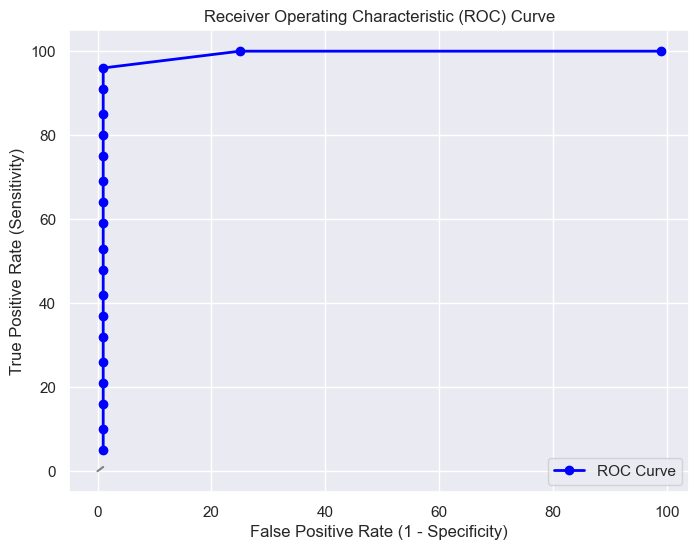

In [344]:

fpr = (1 - task_df['Cumulative_Bad%']).abs()
tpr = task_df['Cumulative_Good%']

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Customer Risk Segmentation 

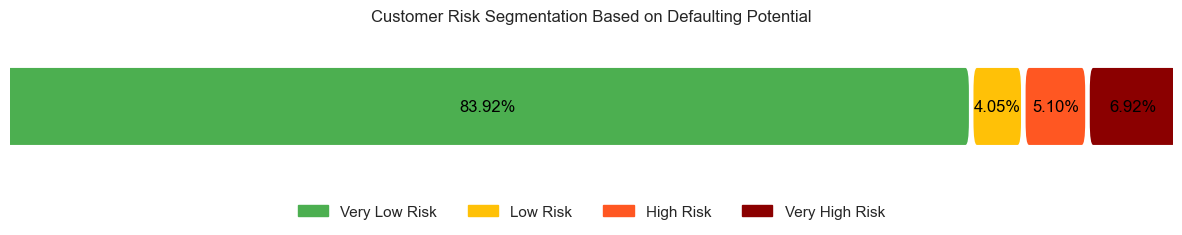

In [345]:
# Categorize customers based on Prob_0
conditions = [
    (Business_df['Prob_0'] >= 0.96),
    (Business_df['Prob_0'] >= 0.88) & (Business_df['Prob_0'] < 0.96),
    (Business_df['Prob_0'] >= 0.51) & (Business_df['Prob_0'] < 0.88),
    (Business_df['Prob_0'] < 0.51)
]

risk_level = ['Very Low Risk', 'Low Risk', 'High Risk', 'Very High Risk']

Business_df['Risk_Category'] = pd.cut(Business_df['Prob_0'],
                                      bins=[0, 0.51, 0.88, 0.96, 1],
                                      labels=['Very High Risk', 'High Risk', 'Low Risk', 'Very Low Risk'],
                                      include_lowest=True)

# Count the number of customers in each risk category and convert to percentages
category_counts = Business_df['Risk_Category'].value_counts(normalize=True).reindex(risk_level, fill_value=0) * 100

# Plotting the divided bar chart using seaborn
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(15, 2))

# Create segments within the bar
start = 0
colors = ['#4CAF50', '#FFC107', '#FF5722', '#8B0000']  # Colors for each risk category
gap = 0.5  # Gap between segments

total_width = category_counts.sum() + gap * (len(risk_level) - 1)
for i, (category, color) in enumerate(zip(risk_level, colors)):
    width = category_counts[category] - gap if i < len(risk_level) - 1 else category_counts[category]
    bar = patches.FancyBboxPatch((start, -0.2), width, 0.4,
                                 boxstyle="round,pad=0.3", linewidth=0, facecolor=color)
    ax.add_patch(bar)
    ax.text(start + width / 2, 0, f'{category_counts[category]:.2f}%', ha='center', va='center', color='black', fontsize=12)
    start += category_counts[category] + gap

# Set the limits to avoid plotting issues
ax.set_xlim(0, total_width)
ax.set_ylim(-1, 1)

# Remove axes for a cleaner look
ax.axis('off')

# Add title
plt.title('Customer Risk Segmentation Based on Defaulting Potential')

# Add legend
legend_handles = [patches.Patch(color=color, label=category) for color, category in zip(colors, risk_level)]
ax.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(risk_level), frameon=False)

# Show the chart
plt.show()


# Business Focus

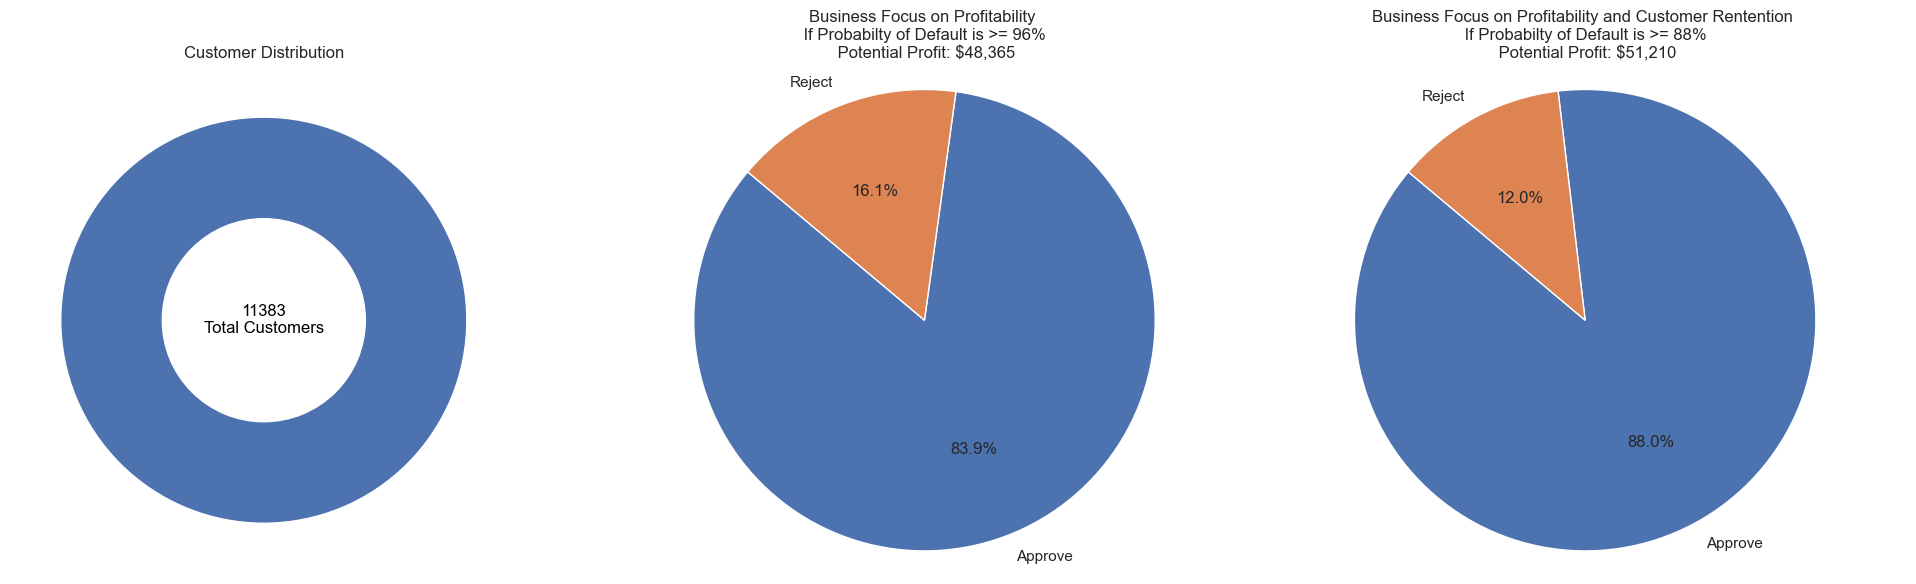

In [346]:
# Count of customers
total_customers = Business_df['customer_id'].value_counts().size

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Pie chart for total customers
sizes = [total_customers]
labels = ['Total Customers']
colors = ['green']
axs[0].pie(sizes, autopct='', startangle=90, wedgeprops=dict(width=0.5, edgecolor='w'), colors='blue')
axs[0].text(0, 0, f'{total_customers}\nTotal Customers', va='center', ha='center', fontsize=12, color='black')
axs[0].set_title('Customer Distribution')

# Define labels and counts for the first pie chart
labels_96 = ['Approve', 'Reject']
counts_96 = [
    len(Business_df[Business_df['Prob_0'] >= 0.96]),
    len(Business_df[Business_df['Prob_0'] < 0.96]) 
]

# Create the first pie chart
axs[1].pie(counts_96, labels=labels_96, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Business Focus on Profitability \n If Probabilty of Default is >= 96% \n Potential Profit: $48,365')
axs[1].axis('equal') 

# Define labels and counts for the second pie chart
labels_88 = ['Approve', 'Reject']
counts_88 = [
    len(Business_df[Business_df['Prob_0'] >= 0.88]),
    len(Business_df[Business_df['Prob_0'] < 0.88]) 
]

# Create the second pie chart
axs[2].pie(counts_88, labels=labels_88, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Business Focus on Profitability and Customer Rentention \n If Probabilty of Default is >= 88% \n Potential Profit: $51,210')
axs[2].axis('equal') 

plt.tight_layout()
plt.show()


# Decision Output
It was Assumed Priority will be given to Profitability due to high tolerance to risk

In [347]:
# Create Decision_df with customer_id and credit_card_default columns
Decision_df = pd.DataFrame()
Decision_df['customer_id'] = Refined_data['customer_id']
Decision_df['credit_card_default'] = Refined_data['credit_card_default']

# Append Risk_level from Business_df to Decision_df
Decision_df = Decision_df.merge(Business_df[['customer_id', 'Risk_Category']], on='customer_id', how='left')

#rename Risk_Cathegory to Risk Level
Decision_df.rename(columns={'Risk_Category': 'Risk_level'}, inplace=True)

# Create Recommendation column based on Risk_level
Decision_df['Recommendation'] = Decision_df['Risk_level'].apply(lambda x: 'Approve' if x in ['Very Low Risk'] else 'Reject')

In [348]:
Decision_df.tail(10)

,customer_id,credit_card_default,Risk_level,Recommendation
11373,CST_103765,0,Very Low Risk,Approve
11374,CST_143228,0,Very Low Risk,Approve
11375,CST_161521,0,Very Low Risk,Approve
11376,CST_145666,0,Very Low Risk,Approve
11377,CST_138460,0,Very Low Risk,Approve
11378,CST_142412,0,Very Low Risk,Approve
11379,CST_107967,0,Very Low Risk,Approve
11380,CST_134002,0,Low Risk,Reject
11381,CST_146856,0,Very Low Risk,Approve
11382,CST_112001,0,Very Low Risk,Approve


In [349]:
# Save Decision_df to an Excel file
decision_file_path = 'Decision_df.xlsx'
Decision_df.to_excel(decision_file_path, index=False)

print(f"Decision_df has been saved to {decision_file_path}")


Decision_df has been saved to Decision_df.xlsx
